In [308]:
# Imports
import dgl
import numpy as np
import networkx as nx
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import BettiCurve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# IMDB-BINARY
A dataset consisting of 2 genres (Action and Romance) with an edge between 2 actors if they appeared in the same movie according to IMDB

In [499]:
# Import dataset and process graphs
dataset = dgl.data.TUDataset('IMDB-BINARY')

X = [] # traditional sub-level filtration using degree function but with 0s on the diagonals
y = []

for i, (graph, label) in enumerate(dataset):
    print('Progress:', i + 1, '/', len(dataset), end='\r') # Show progress
    graph = graph.to_simple()
    graph_degrees = graph.out_degrees()

    matrix = []
    # loop through every pair of vertices
    for i in range(graph.num_nodes()):
        matrix.append([])
        for j in range(graph.num_nodes()):
            if i == j:
                matrix[-1].append(0) # diagonals have 0 value so all vertices initially appear in the filtration
            elif graph.has_edge_between(i, j):
                matrix[-1].append(max(graph_degrees[i], graph_degrees[j])) # max of degrees
            else:
                matrix[-1].append(np.inf) # there is no edge between the two vertices so distance is infinity
    X.append(np.array(matrix))
    y.append(label)

c:\Users\jaxso\anaconda3\envs\tda\lib\site-packages\dgl\heterograph.py:2851: DGLWarning:

DGLGraph.has_edge_between is deprecated. Please use DGLGraph.has_edges_between



Label: 0


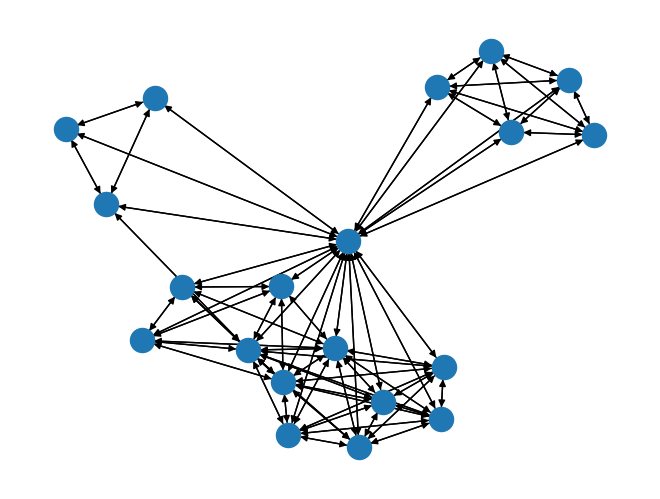

In [507]:
# Draw graph with label 0
graph, label = dataset[0]
graph = graph.to_simple()
nx_graph = graph.to_networkx()

print('Label:', int(label)) # 0 is Action?
nx.draw(nx_graph)

Label: 1


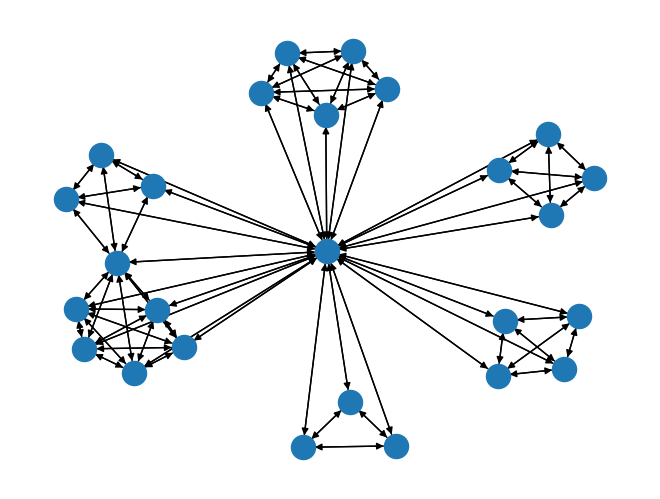

In [436]:
# Draw graph with label 1
graph, label = dataset[-1]
graph = graph.to_simple()
nx_graph = graph.to_networkx()

print('Label:', int(label)) # 1 is Romance?
nx.draw(nx_graph)

Label: 0


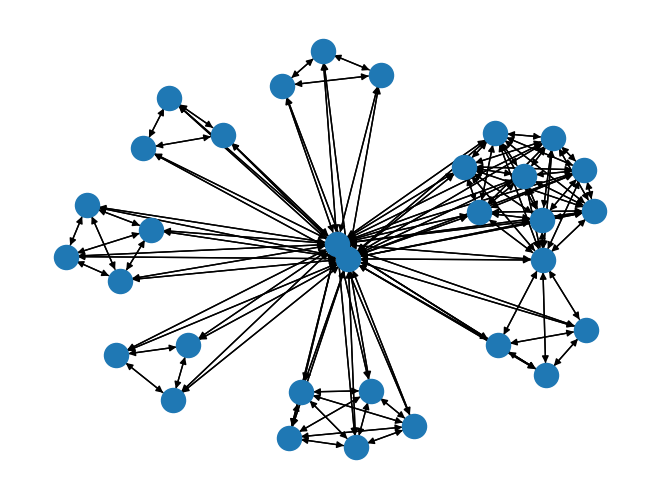

In [508]:
VR = VietorisRipsPersistence(metric="precomputed", homology_dimensions=[0])

diagrams = VR.fit_transform(X)

i = 1

# Draw graph i and plot its persistence diagram
graph, label = dataset[i]
graph = graph.to_simple()
nx_graph = graph.to_networkx()

print('Label:', int(label)) # 1 is Romance?
nx.draw(nx_graph)

VR.plot(diagrams, sample=i)

In [509]:
# Betti_0 functions
BC = BettiCurve(n_bins=100) # default value

betti0 = BC.fit_transform(diagrams)

BC.plot(betti0, sample=i)

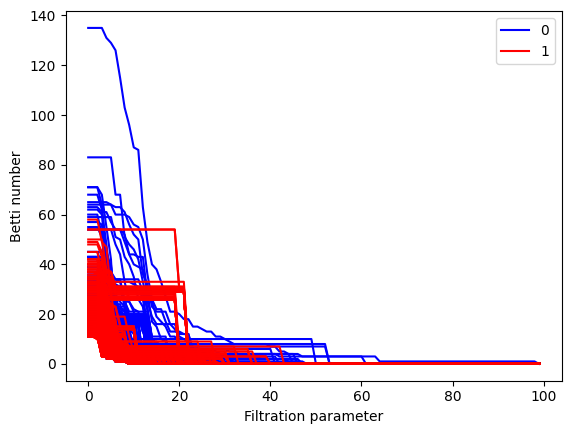

In [526]:
# Plotting curves for class 0
import matplotlib.pyplot as plt

for i in range(len(betti0)):
    plt.plot(betti0[i][0], 'b' if int(y[i]) == 0 else 'r')

plt.xlabel('Filtration parameter')
plt.ylabel('Betti number')
plt.legend(['0', '1'])
legend = plt.gca().get_legend()
legend.legendHandles[1].set_color('r')
plt.show()

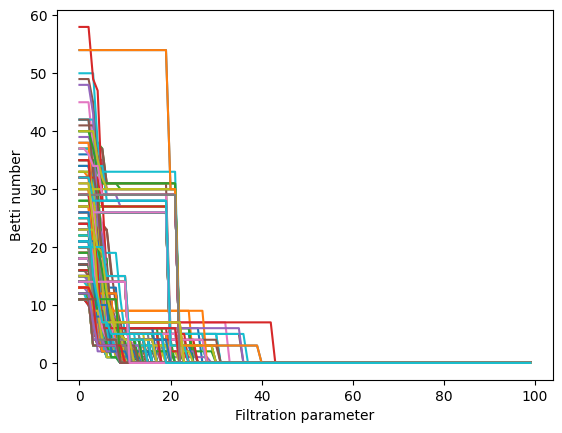

In [512]:
# Plotting curves for class 0
# Betti_0 functions
import matplotlib.pyplot as plt

for i in range(len(betti0)):
    if int(y[i]) == 1:
        plt.plot(betti0[i][0])

plt.xlabel('Filtration parameter')
plt.ylabel('Betti number')
plt.show()

In [464]:
# XGBoost Classifier
betti0reshaped = betti0.reshape((betti0.shape[0], betti0.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(betti0reshaped, y, test_size=.2, random_state=42) # 80% train-test split

xg = XGBClassifier(random_state=42)

xg.fit(X_train, y_train)

predictions = xg.predict(X_test)

errors = sum(abs(predictions - y_test))
print('Accuracy:', 1 - errors / len(predictions))

Accuracy: 0.725


# IMDB-MULTI
A dataset consisting of 3 genres (Comedy, Romance, Sci-Fi) with an edge between 2 actors if they appeared in the same movie according to IMDB

In [466]:
# Import dataset and process graphs
dataset = dgl.data.TUDataset('IMDB-MULTI')

X = [] # traditional sub-level filtration but using degree function but with 0s on the diagonals
y = []

all_degrees = []

for i, (graph, label) in enumerate(dataset):
    print('Progress:', i + 1, '/', len(dataset), end='\r') # Show progress
    graph = graph.to_simple()
    graph_degrees = graph.out_degrees()
    for degree in graph_degrees:
        all_degrees.append(int(degree))

    matrix = []
    # loop through every pair of vertices
    for i in range(graph.num_nodes()):
        matrix.append([])
        for j in range(graph.num_nodes()):
            if i == j:
                matrix[-1].append(0) # diagonals have 0 value so all vertices initially appear in the filtration
            elif graph.has_edge_between(i, j):
                matrix[-1].append(max(graph_degrees[i], graph_degrees[j])) # max of degrees
            else:
                matrix[-1].append(np.inf) # there is no edge between the two vertices so distance is infinity
    X.append(np.array(matrix))
    y.append(int(label))

c:\Users\jaxso\anaconda3\envs\tda\lib\site-packages\dgl\heterograph.py:2851: DGLWarning:

DGLGraph.has_edge_between is deprecated. Please use DGLGraph.has_edges_between



Label: 0


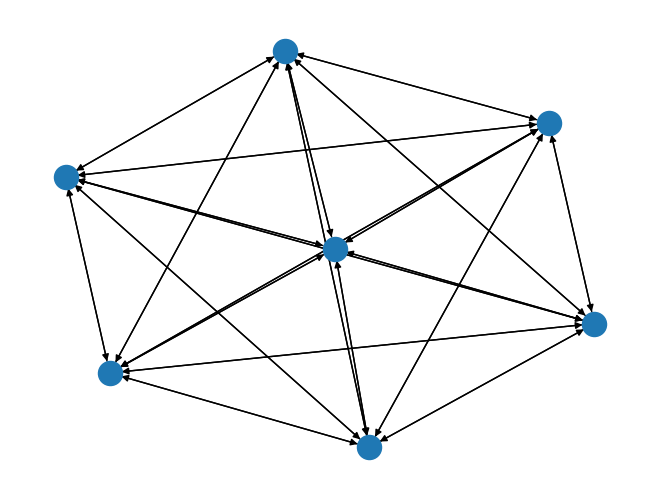

In [417]:
# Draw graph with label 0
graph, label = dataset[0]
graph = graph.to_simple()
nx_graph = graph.to_networkx()

print('Label:', int(label)) # 0 is Comedy?
nx.draw(nx_graph)

Label: 1


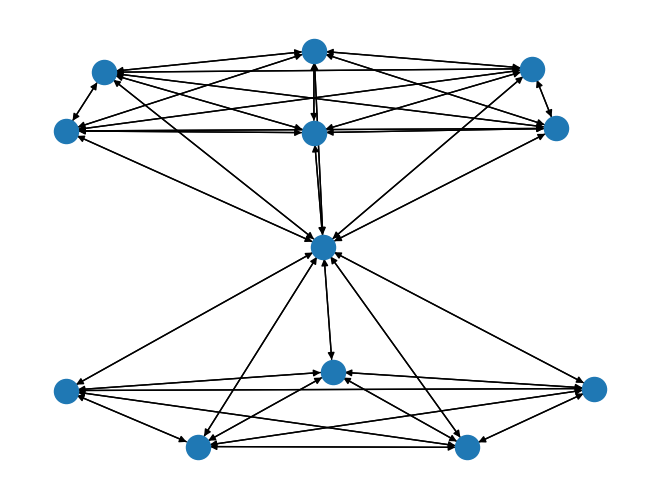

In [468]:
# Draw graph with label 1
graph, label = dataset[len(dataset) // 2 - 1]
graph = graph.to_simple()
nx_graph = graph.to_networkx()

print('Label:', int(label)) # 1 is Romance?
nx.draw(nx_graph)

Label: 2


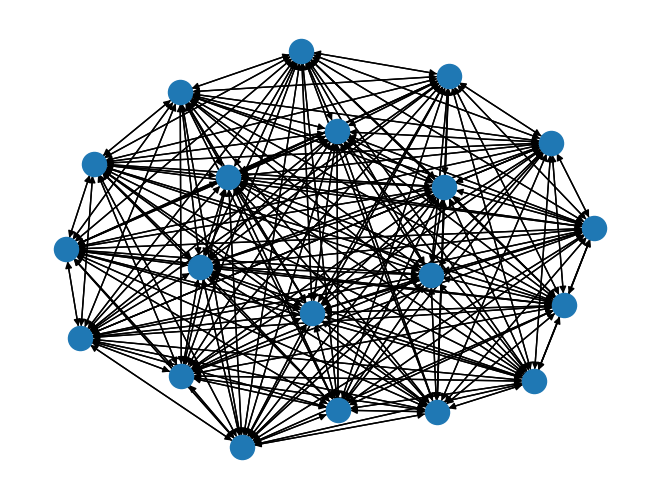

In [414]:
# Draw graph with label 2
graph, label = dataset[-1]
graph = graph.to_simple()
nx_graph = graph.to_networkx()

print('Label:', int(label)) # 2 is Sci-Fi?
nx.draw(nx_graph)

In [469]:
VR = VietorisRipsPersistence(metric="precomputed", homology_dimensions=[0])

diagrams = VR.fit_transform(X)

VR.plot(diagrams, sample=0)

In [470]:
# Betti_0 functions
BC = BettiCurve(n_bins=100) # default value

betti0 = BC.fit_transform(diagrams)

BC.plot(betti0, sample=0)

In [480]:
# XGBoost Classifier
betti0reshaped = betti0.reshape((betti0.shape[0], betti0.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(betti0reshaped, y, test_size=.2, random_state=0) # 80% train-test split

xg = XGBClassifier(random_state=0)

xg.fit(X_train, y_train)

predictions = xg.predict(X_test)

errors = sum(abs(predictions - y_test))
print('Accuracy:', 1 - errors / len(predictions))

Accuracy: 0.3833333333333333
